# IMPORTING LIBRARIES

In [1]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [1]:
pip install tensorflow==2.3.0

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
pip install keras==2.4.0

  Using cached Keras-2.4.0-py2.py3-none-any.whl (170 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import tensorflow
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
from keras.preprocessing import image

Using TensorFlow backend.


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_ds = train_datagen.flow_from_directory('dataset/train_set', target_size=(64, 64),
                                             class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('dataset/test_set', target_size=(64, 64),
                                            class_mode='categorical', batch_size=5, color_mode='rgb')


Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))
    

Epoch 1/20
149/149 [==============================] - 43s 288ms/step - loss: 1.3040 - accuracy: 0.3598 - val_loss: 1.2595 - val_accuracy: 0.4848
Epoch 2/20
149/149 [==============================] - 38s 257ms/step - loss: 1.0735 - accuracy: 0.5404 - val_loss: 0.9455 - val_accuracy: 0.5606
Epoch 3/20
149/149 [==============================] - 40s 268ms/step - loss: 0.8619 - accuracy: 0.6604 - val_loss: 0.8578 - val_accuracy: 0.6717
Epoch 4/20
149/149 [==============================] - 37s 249ms/step - loss: 0.7723 - accuracy: 0.7035 - val_loss: 0.8115 - val_accuracy: 0.6566
Epoch 5/20
149/149 [==============================] - 39s 262ms/step - loss: 0.7099 - accuracy: 0.7278 - val_loss: 0.8615 - val_accuracy: 0.6465
Epoch 6/20
149/149 [==============================] - 75s 503ms/step - loss: 0.6797 - accuracy: 0.7466 - val_loss: 0.6725 - val_accuracy: 0.7677
Epoch 7/20
149/149 [==============================] - 66s 446ms/step - loss: 0.6020 - accuracy: 0.7776 - val_loss: 0.7913 - val_ac

In [11]:
model.save('model.h5')

In [12]:
result = model.evaluate(test_ds)

40/40 [==============================] - 7s 183ms/step - loss: 0.5853 - accuracy: 0.8232


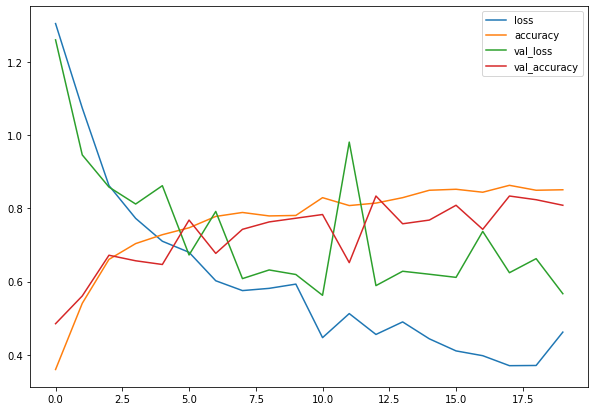

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [14]:
model = load_model('model.h5')

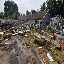

In [15]:
img = image.load_img("dataset/test_set/Earthquake/1339.jpg", target_size = (64, 64))
img

In [16]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

array([1], dtype=int64)

In [17]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])


In [18]:
result

array('Earthquake', dtype='<U10')